In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# To change by the path to your dataset 
file_path = 'titanic.csv'

In [3]:
# To read the csv file with pandas
df = pd.read_csv(file_path, index_col='PassengerId')

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
# To describe the numerical values use describe on the dataframe
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='all') # add include='all' to describe all columns

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.isna().sum(axis=0) # this is a simple way to know how many missing values (=NaN)
# that you have on each column

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Let us get rid of the missing values in the column Age
df = df[~df['Age'].isna()]

In [9]:
# No more missing values for the column Age!
df.isna().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      2
dtype: int64

### Problem we want to solve
- What are the main factors that are ensuring survival of passanger in Titanic?

### Hypothesis : Women and Children are saved first! 
==> Age and Sex might be important factors

In [10]:
# Let us compute the average of survival women and passenger aged less than 15 years old

# We first create a boolean filter (vector of True and False) to filter passengers of Sex 'female'
is_female = (df.Sex == 'female')

# We create also a filter for passenger with Age < 15 (15 was randomly chosed for this example)

is_child = (df.Age < 15)

# children and women means a 'Or' condition between the two filters 

is_female_or_child = is_female | is_child


# then we select column Survived from the dataframe filtred on indexes is_female_or_child and compute its mean
print('Survival rate for women and children :', df.loc[is_female_or_child,'Survived'].mean())

Survival rate for women and children : 0.7266666666666667


In [11]:
# Now let us compute this same value for male aged more than 15

print('Survival rate for male older than 15 :', df.loc[(df.Age >= 15) & (df.Sex == 'male'),'Survived'].mean())

Survival rate for male older than 15 : 0.17391304347826086


In [12]:
# Note : we can compute the same value using the opposit of the filter created for is_female_or_child

print('Survival rate for passenger that are not women nor child : ', df.loc[~is_female_or_child,'Survived'].mean())

Survival rate for passenger that are not women nor child :  0.17391304347826086


## Boolean operations with pandas 
* **Or** is equivalent to `|`
* **And** is equivalent to `&`
* **Not** is equivalent to `~`

## Rule based model
Le us create a function to which we can give a row of the dataframe, and returns a prediction

The function will emulate the behavior of the following decision tree

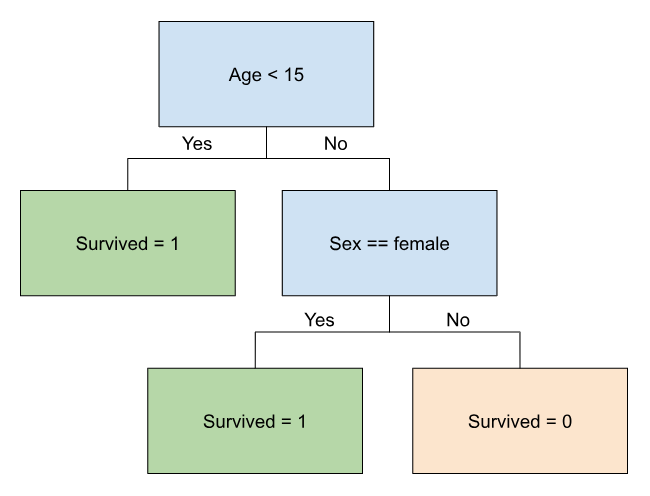





In [13]:
def will_survive(passenger):
    '''Predict the survival of a passanger
    Args:
        passenger : pandas Series object with index 'Sex' and 'Age'
    Return:
        int of value 1 if survived and 0 if 
    '''
    age = passenger['Age']
    sex = passenger['Sex']
    if age < 15:
        return 1
    elif sex =='female':
        return 1
    else:
        return 0

In [14]:
passenger = df.loc[10]

In [15]:
passenger

Survived                                      1
Pclass                                        2
Name        Nasser, Mrs. Nicholas (Adele Achem)
Sex                                      female
Age                                        14.0
SibSp                                         1
Parch                                         0
Ticket                                   237736
Fare                                    30.0708
Cabin                                       NaN
Embarked                                      C
Name: 10, dtype: object

In [16]:
will_survive(passenger)

1

In [17]:
for i in df.index:
    # we get the row and the index i
    passenger = df.loc[i]

    # we compute the prediction of survival for this passenger using the function will_sruvive 
    prediction = will_survive(passenger)

    # we store the predict on the row of index i and column Survival_predict
    # note: with df.loc[] if the column does not exist, pandas will create it
    df.loc[i,'Survival_prediction'] = prediction
    
# The for loop is equivalent to the line above but much faster
df.loc[:,'Survival_prediction'] = df.apply(will_survive, axis=1)


/tmp/user/1001/ipykernel_56644/1668613158.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i,'Survival_prediction'] = prediction


In [18]:
# How to compute accuracy with pandas dataframe columns
(df.Survived == df.Survival_prediction).mean()

0.7843137254901961

In [19]:
!pip install scikit-learn

In [20]:
from sklearn.model_selection import train_test_split

In [41]:
df_train, df_test = train_test_split(df,test_size=0.2, random_state=1337)

In [42]:
df_train.shape

(571, 12)

In [43]:
df_test.shape

(143, 12)

In [44]:
X_train = df_train[['Age', 'Sex']]
y_train = df_train['Survived']

In [45]:
X_test = df_test[['Age', 'Sex']]
y_test = df_test['Survived']

In [46]:
X_train.loc[:,'male'] = pd.get_dummies(X_train.Sex, drop_first=True).values

/tmp/user/1001/ipykernel_56644/3121171249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,'male'] = pd.get_dummies(X_train.Sex, drop_first=True).values


In [47]:
X_test.loc[:,'male'] = pd.get_dummies(X_test.Sex, drop_first=True).values

/tmp/user/1001/ipykernel_56644/1100692631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,'male'] = pd.get_dummies(X_test.Sex, drop_first=True).values


In [48]:
X_train = X_train.drop(columns='Sex')

In [49]:
X_test = X_test.drop(columns='Sex')

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [66]:
model = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [67]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [68]:
y_test_predict = model.predict(X_test)

In [69]:
(y_test_predict ==  y_test).mean()

0.7482517482517482

In [70]:
X_train

,Age,male
PassengerId,,
776,18.0,True
264,40.0,True
297,23.5,True
637,32.0,True
131,33.0,True
...,...,...
600,49.0,True
210,40.0,True
289,42.0,True


In [71]:
X_train

,Age,male
PassengerId,,
776,18.0,True
264,40.0,True
297,23.5,True
637,32.0,True
131,33.0,True
...,...,...
600,49.0,True
210,40.0,True
289,42.0,True


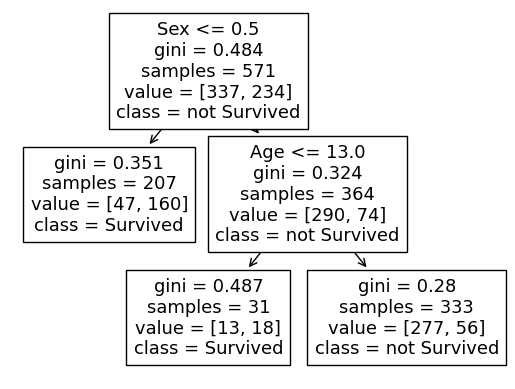

In [72]:
plot_tree(model, feature_names=['Age', 'Sex'], class_names=['not Survived','Survived'])
plt.show()

In [73]:
(df_test.Survival_prediction == df_test.Survived).mean()

0.7412587412587412

In [74]:
(y_test_predict ==  y_test).mean()

0.7482517482517482